In [1]:
!ls data/

xtest.csv  xtrain.csv  ytrain.csv


In [2]:
import pandas as pd, numpy as np

In [4]:
xtest = pd.read_csv('data/xtest.csv')
xtrain = pd.read_csv('data/xtrain.csv')

ytrain = pd.read_csv('data/ytrain.csv')

In [9]:
xtest.columns

Index(['message_id', 'flight_provider', 'sentiment_what', 'username',
       'negreas_what', 'thumbs_up', 'text', 'user_latlon', 'message_time',
       'user_location', 'tz', 'user_type'],
      dtype='object')

In [21]:
xtrain[xtrain['confidence']==1]['user_type'].value_counts()

pessimistic    6328
realistic      1207
optimistic      900
Name: user_type, dtype: int64

In [94]:
xtrain

,message_id,confidence,flight_provider,sentiment_what,username,negreas_what,thumbs_up,text,user_latlon,message_time,user_location,tz,user_type
0,569506361266085888,1.0000,US Airways,NaN,0010a36e40fbefd3bbbacd746e4afd7c,NaN,0.0,@USAirways my brother @BRizzyberg27 missed his...,NaN,2015-02-22 06:37:52 -0800,NaN,NaN,pessimistic
1,568279456780980226,0.6508,United,NaN,0016a98e8372ca75a7df6d7a4894dde3,NaN,0.0,@united Pls post video of belligerent jerk ran...,NaN,2015-02-18 21:22:35 -0800,New York,Quito,pessimistic
2,569946921265184768,1.0000,United,NaN,0019e2fa5b69901da31c5567f510f3cc,NaN,0.0,@united Flight UA1270 is descending into farce...,NaN,2015-02-23 11:48:29 -0800,"Brighton, UK",NaN,pessimistic
3,569491240481382400,1.0000,US Airways,NaN,001ab87451bfa3a9d9b487a1ba6ea8a7,NaN,1.0,@USAirways instead of tweeting your customers ...,NaN,2015-02-22 05:37:47 -0800,wherever uncle sam sends me,Eastern Time (US & Canada),pessimistic
4,569152740414218240,1.0000,United,NaN,00432ea46b0ec4ed5f3fb8b65abbabce,NaN,0.0,@united I sent my details to the customer care...,NaN,2015-02-21 07:12:42 -0800,San Francisco,Pacific Time (US & Canada),pessimistic
5,570002269577441280,0.7195,American,NaN,004bcce45832b7b02ea3a2c96fce2439,NaN,0.0,@AmericanAir a free check bag a food comp a fl...,"['-89.769988', '35.17263842']",2015-02-23 15:28:25,new york city,Central Time (US & Canada),pessimistic
6,570002432375148544,1.0000,American,NaN,004bcce45832b7b02ea3a2c96fce2439,NaN,0.0,@AmericanAir for my delay and you know what I ...,"['-89.76989935', '35.1728241']",2015-02-23 15:29:04 -0800,new york city,Central Time (US & Canada),pessimistic
7,570283254743506944,1.0000,American,NaN,004bcce45832b7b02ea3a2c96fce2439,NaN,0.0,@AmericanAir worst company ever please do not ...,"['-73.91640136', '40.68996177']",2015-02-24 10:04:57 -0800,new york city,Central Time (US & Canada),pessimistic
8,570283851018317824,1.0000,American,NaN,004bcce45832b7b02ea3a2c96fce2439,NaN,0.0,@AmericanAir cost me over 200 dollars because ...,"['-73.91637642', '40.68994668']",2015-02-24 10:07:20 -0800,new york city,Central Time (US & Canada),pessimistic
9,570021682569555968,1.0000,American,NaN,004bcce45832b7b02ea3a2c96fce2439,NaN,0.0,@AmericanAir for our delays !!! I'm out of mor...,NaN,2015-02-23 16:45:34 -0800,new york city,Central Time (US & Canada),pessimistic


In [13]:
xtrain.shape

(11895, 13)

In [23]:
from __future__ import print_function, division
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
def plot_duplicates(df):
    df = df.dropna(axis=1, thresh = 10)
    result = {col:df.duplicated([col]).sum() for col in df.columns}
    plt.figure(figsize=(6,8))
    plt.barh(list(result.keys()), list(result.values()), color='g', alpha=0.5)
    plt.show()

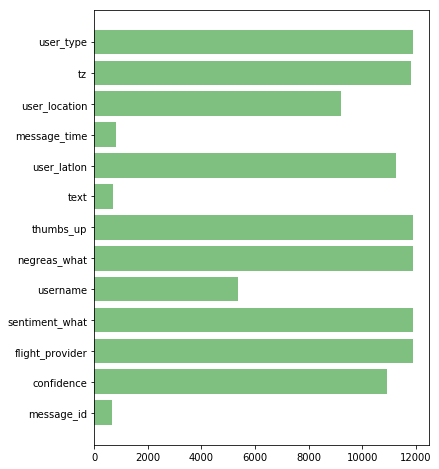

In [54]:
plot_duplicates(xtrain)

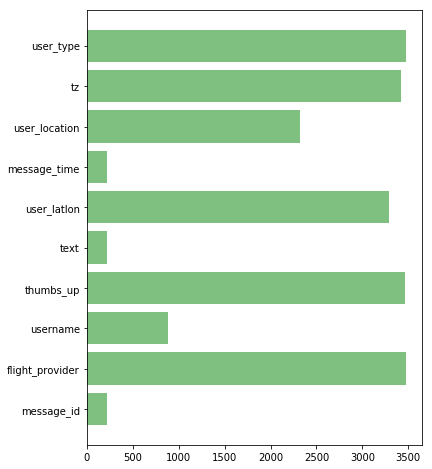

In [55]:
plot_duplicates(xtest)

In [56]:
def plot_nunique(df):
    df = df.dropna(axis=1, thresh = 10)
    nunique = df.nunique(dropna=False)
    plt.figure(figsize=(10,6))
    _ = plt.hist(nunique.astype(float)/df.shape[0], bins=50)
    plt.show()

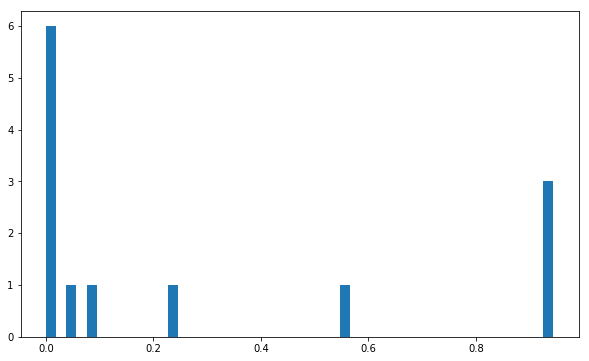

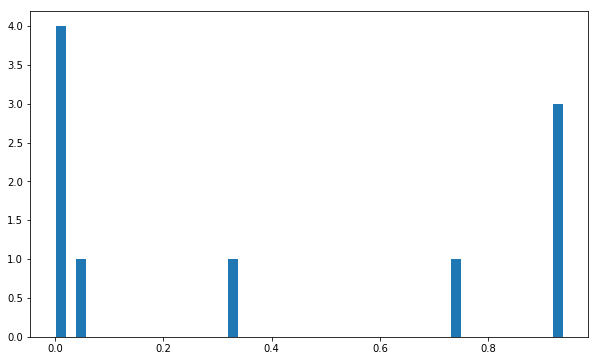

In [57]:
plot_nunique(xtrain)

plot_nunique(xtest)

In [32]:
xtrain.shape

(11895, 13)

In [31]:
xtrain.nunique(dropna=False)

message_id         11224
confidence           958
flight_provider        6
sentiment_what         4
username            6550
negreas_what          14
thumbs_up             17
text               11181
user_latlon          655
message_time       11097
user_location       2701
tz                    78
user_type              3
dtype: int64

In [ ]:
xtest.shape

In [58]:
xtest.nunique(dropna=False)

message_id         3261
flight_provider       6
sentiment_what        2
username           2598
negreas_what          2
thumbs_up             7
text               3259
user_latlon         186
message_time       3255
user_location      1160
tz                   57
user_type             3
dtype: int64

In [35]:
xtrain.isnull().sum()

message_id             0
confidence             0
flight_provider        0
sentiment_what     11855
username               0
negreas_what       11864
thumbs_up              0
text                   0
user_latlon        11045
message_time           0
user_location       3825
tz                  3885
user_type              0
dtype: int64

In [36]:
xtest.isnull().sum()

message_id            0
flight_provider       0
sentiment_what     3475
username              0
negreas_what       3475
thumbs_up             0
text                  0
user_latlon        3256
message_time          0
user_location      1126
tz                 1172
user_type             0
dtype: int64

In [78]:
def val_count(df):
    for col in df.columns:
        print(df[col].value_counts().head(15))

In [113]:
xtrain['message_time'] = xtrain['message_time'].apply(lambda x: x.split(' ')[0])
xtest['message_time'] = xtest['message_time'].apply(lambda x: x.split(' ')[0])

In [114]:
val_count(xtrain)

570270777121103872    4
570273819287531520    3
570281958556610560    3
570304633048047616    3
570268326250745856    3
570300262302289920    3
570303889754488832    3
570302358242115584    3
570280225625362432    3
570288282413633536    3
570278644918194176    3
570305234838429696    3
570306529947193344    3
570281470507352064    3
568884731489562624    2
Name: message_id, dtype: int64
1.0000    8435
0.6667      56
0.6632      31
0.6598      27
0.6701      25
0.6559      24
0.6600      23
0.6596      23
0.6842      23
0.6771      21
0.6421      20
0.6737      20
0.6739      20
0.6774      19
0.6809      19
Name: confidence, dtype: int64
United            3098
US Airways        2358
American          2198
Southwest         1998
Delta             1836
Virgin America     407
Name: flight_provider, dtype: int64
negative    31
positive     6
neutral      3
Name: sentiment_what, dtype: int64
3cc357f730c7d328bba0029209fe7aa8    52
404490e603aaf1821aa8c42a9b90d754    28
6c6ca10080734b7286365

In [115]:
val_count(xtest)

570281854139572225    3
570284054605639683    3
570301929580048385    3
569222729125253121    2
570069217879461889    2
570271574462369793    2
568063386321158145    2
570271367519604737    2
567967937446834177    2
570295576446808065    2
568195292803129345    2
569904824793362433    2
568644053522391041    2
568890062286385153    2
567748973910163457    2
Name: message_id, dtype: int64
United            915
American          703
US Airways        690
Southwest         542
Delta             498
Virgin America    129
Name: flight_provider, dtype: int64
negative    2
Name: sentiment_what, dtype: int64
3cc357f730c7d328bba0029209fe7aa8    16
ce993a4d304f4a1684f485bcde9c7815    11
5cb03777687006d05a526fbe014971e6     9
57656c8a496402553c9f6ec418b5e925     7
52925062463765566f564b82384ac63b     7
c9f0497f68ed8c57c5d71b42d8fc5bd5     7
b0992379f49b077d3b6e29f174dbe970     7
9d1fb94d593bf719e84282c3ca577a1d     6
e4b5232632a77587deeec814f2fafaa2     6
404490e603aaf1821aa8c42a9b90d754     6
ab

In [73]:
xtrain['flight_provider'].value_counts().head()

United        3098
US Airways    2358
American      2198
Southwest     1998
Delta         1836
Name: flight_provider, dtype: int64

In [ ]:
xtrain['flight_provider'].value_counts()

In [61]:
xtest.dropna(axis=1, thresh = 10).corr()

,message_id,thumbs_up
message_id,1.000000,-0.009436
thumbs_up,-0.009436,1.000000


sentiment_what, negreas_what, 

In [72]:
ytrain['sentiment'].value_counts()

negative    7411
neutral     2522
positive    1962
Name: sentiment, dtype: int64

In [86]:
xtrain['message_id'].value_counts()[xtrain['message_id'].value_counts()!=1]

570270777121103872    4
570273819287531520    3
570281958556610560    3
570304633048047616    3
570268326250745856    3
570300262302289920    3
570303889754488832    3
570302358242115584    3
570280225625362432    3
570288282413633536    3
570278644918194176    3
570305234838429696    3
570306529947193344    3
570281470507352064    3
568884731489562624    2
568303606710956032    2
569429411646156800    2
569970318305046528    2
569684820604817408    2
567811268900556802    2
570187080426397696    2
569995536545091584    2
569346721173655552    2
568955060165554176    2
567851763136491520    2
569291509305970688    2
568607562251108352    2
569693820398510080    2
568200385849995264    2
569218789834821632    2
                     ..
570298744723415040    2
569259333197930498    2
569878584967344128    2
569972804822704128    2
569311730540683264    2
570268420140244992    2
569506389397282816    2
569656322154565632    2
569316018230677504    2
568579899243380736    2
5694189621081620

In [88]:
665*4

2660

In [116]:
def comare_df(df1, df2):
    for col in df1.columns:
        if col in df2.columns:
            ind = df1[col].isin(df2[col]) & df2[col].isin(df1[col])
            print(col, sum(ind))

In [117]:
ind = xtest.message_id.isin(xtrain.message_id) & xtrain.message_id.isin(xtest.message_id)

In [118]:
sum(ind)

0

In [119]:
comare_df(xtrain, xtest)

message_id 0
flight_provider 3477
sentiment_what 3476
username 735
negreas_what 3472
thumbs_up 3475
text 0
user_latlon 2981
message_time 3474
user_location 2246
tz 3458
user_type 3477


In [111]:
xtrain['user_type'].loc[0]

'pessimistic'

In [110]:
ytrain['sentiment'].loc[0]

'negative'

In [ ]:
yt